In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
#Linear regression with one variable

data = pd.read_csv('dane1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [88]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


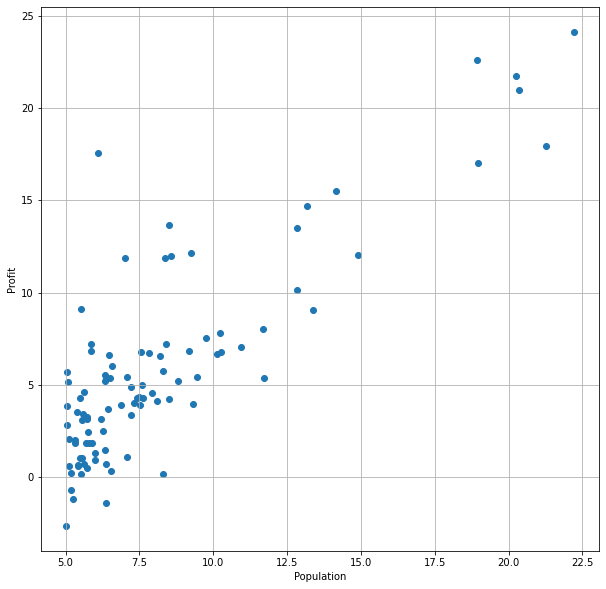

In [89]:
plt.figure(figsize = [10, 10])
plt.scatter(data['Population'], data['Profit'])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.grid()
plt.show()

In [90]:
data.insert(0, 'x1', np.ones(data.shape[0]))
data.describe()

,x1,Population,Profit
count,97.0,97.000000,97.000000
mean,1.0,8.159800,5.839135
std,0.0,3.869884,5.510262
min,1.0,5.026900,-2.680700
25%,1.0,5.707700,1.986900
50%,1.0,6.589400,4.562300
75%,1.0,8.578100,7.046700
max,1.0,22.203000,24.147000


In [373]:
X = data[['x1', 'Population']]
y = data['Profit']
X = np.transpose(np.matrix(X.values, dtype = np.float64))
y = np.matrix(y.values, dtype = np.float64)
theta = np.matrix(np.array([0, 0]), dtype = np.float64)

In [374]:
def computeCost(X, y, theta):
    preds = theta.dot(X)
    return np.sum(np.square(preds - y))/(2*y.shape[1])

In [375]:
computeCost(X, y, theta)

32.072733877455676

In [376]:
# def gradientDescent (X, y, theta, alpha, iterations):
#     theta0 = theta[0, 0]
#     theta1 = theta[0, 1:]
#     for it in range(iterations):
#         preds = theta.dot(X)
#         theta0 = theta0 - (1/y.size)*alpha*np.sum(preds - y)
#         for i in range(theta1[0].size):
#             theta1[0, i] = theta1[0, i] - (1/y.size)*alpha*X[i + 1, :].dot(np.transpose(preds - y))
#         theta = np.matrix(np.append(theta0, theta1))
#     cost = computeCost(X, y, theta)
#     return theta, cost

def gradientDescent (X, y, theta, alpha, iterations):
    costs = []
    for it in range(iterations):
        preds = theta.dot(X)
        for i in range(theta.size):
            theta[0, i] = float(theta[0, i] - alpha*(1/y.shape[1])*(preds - y).dot(np.transpose(X[i])))
            costs.append(computeCost(X, y, theta))
    return theta, costs

In [377]:
theta, costs = gradientDescent(X, y, theta, 0.01, 1000)
# preds = theta.dot(X)
# theta[0, 1] -= 0.01*(1/y.shape[1])*np.sum((preds - y)*np.transpose(X[1]))
# theta[0, 1]

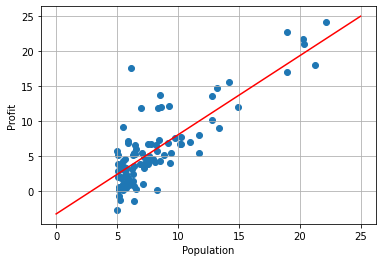

In [378]:
plt.figure()
plt.scatter(data['Population'], data['Profit'])
xx = np.linspace(0, 25, 1000)
plt.plot(xx, theta[0, 0] + theta[0, 1]*xx, color = 'red')
plt.grid()
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

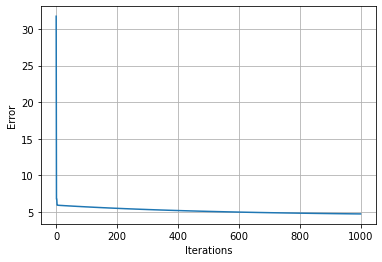

In [382]:
its = np.linspace(0, 1000, 1000)
plt.figure()
plt.plot(its, costs[:1000])
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.grid()
plt.show()

In [383]:
#Linear regression with two variables

data2 = pd.read_csv('dane2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [384]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [385]:
data2 = (data2 - data2.mean())/data2.std()
data2.insert(0, 'x1', np.ones(data2.shape[0]))
data2.describe()

,x1,Size,Bedrooms,Price
count,47.0,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.0,1.889741e-17,2.279500e-16,-8.031401e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,1.0,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,1.0,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,1.0,3.376348e-01,1.090417e+00,3.521863e-01
max,1.0,3.117292e+00,2.404508e+00,2.874981e+00


In [386]:
X = data2[['x1', 'Size', 'Bedrooms']]
y = data2['Price']
X = np.transpose(np.matrix(X.values, dtype = np.float64))
y = np.matrix(y.values, dtype = np.float64)
theta = np.matrix(np.array([0, 0, 0]), dtype = np.float64)

In [387]:
computeCost(X, y, theta)

0.48936170212765967

In [388]:
theta, costs = gradientDescent(X, y, theta, 0.01, 1000)

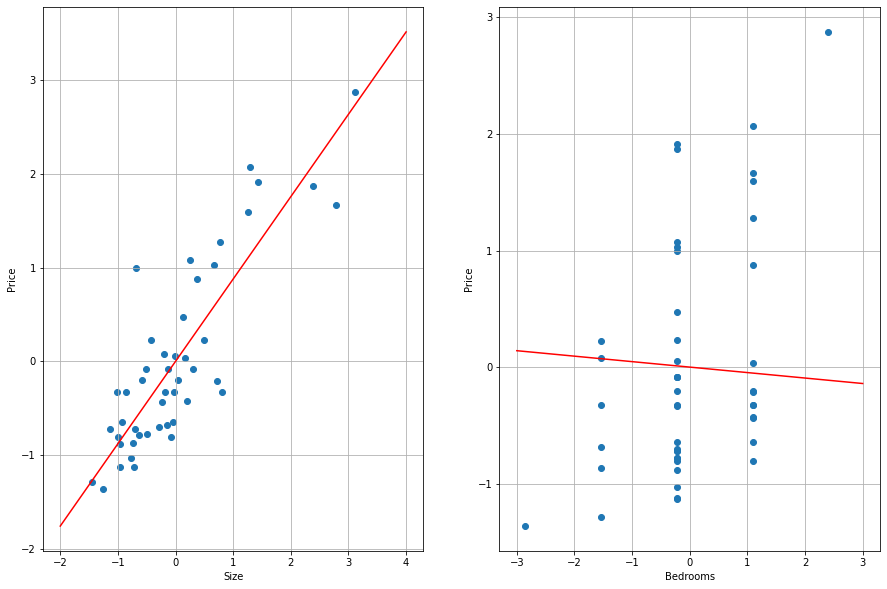

In [403]:
plt.figure(figsize = [15, 10])
plt.subplot(1, 2, 1)
xx = np.linspace(-2, 4, 1000)
plt.plot(xx, theta[0, 1]*xx + theta[0, 0], color = 'red')
plt.scatter(data2['Size'], data2['Price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.grid()
plt.subplot(1, 2, 2)
xx = np.linspace(-3, 3, 1000)
plt.plot(xx, theta[0, 2]*xx + theta[0, 0], color = 'red')
plt.scatter(data2['Bedrooms'], data2['Price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.grid()
plt.show()

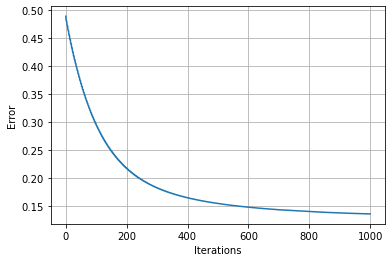

In [389]:
its = np.linspace(0, 1000, 1000)
plt.figure()
plt.plot(its, costs[:1000])
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.grid()
plt.show()

In [413]:
#Linear regression in scikit-learn

from sklearn import datasets, linear_model as linm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [415]:
boston_X = boston.data
boston_Y = boston.target
XTrain, XTest, yTrain, yTest = train_test_split(boston_X, boston_Y, test_size = 0.3, train_size = 0.7)
regr = linm.LinearRegression()
regr.fit(XTrain, yTrain)
yPred = regr.predict(XTest)
print("Coefficients: {}\n".format(regr.coef_))
mse = np.mean((yPred - yTest) ** 2)
r2 = r2_score(yTest, yPred)
print("MSE: {}".format(error))
print("R2: {}".format(r2))

Coefficients: [-1.03348618e-01  4.60922537e-02  1.34956615e-02  2.63541773e+00
 -1.78811702e+01  3.82644381e+00  7.63420009e-03 -1.43612193e+00
  2.72891190e-01 -1.22220481e-02 -9.75098957e-01  7.86396960e-03
 -5.17751779e-01]

MSE: 24.71116251169577
R2: 0.728283024677704
